<a href="https://colab.research.google.com/github/K02D/Interpretable_HPO/blob/main/Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from itertools import combinations
import numpy as np

In [ ]:
 corpus_name = 'en-ja'
 hyp_data = pd.read_csv(f"{corpus_name}.hyps", delimiter="\t")

 eval_data = pd.read_csv(f"{corpus_name}.evals", delimiter="\t")
 bleu = eval_data[eval_data.columns[0]]

In [ ]:
bleu

In [ ]:
# represent each row as a vector
np_bleu = bleu.to_numpy()
np_hyps = hyp_data.to_numpy()
np_bleu

array([18.18, 17.5 , 18.42, 18.16, 20.08,  4.  , 17.99, 16.  , 19.61,
       19.07,  3.07, 17.2 , 19.89, 18.69, 18.22, 17.89, 19.86, 19.65,
       17.6 ,  2.55, 17.9 , 18.25, 15.95, 16.86, 16.63,  2.54, 18.78,
       18.59, 17.5 , 19.06, 17.79, 18.07, 18.19, 19.53, 18.41, 18.7 ,
        3.42,  3.84, 19.91, 19.17, 17.57, 17.81, 18.51,  2.61, 17.65,
       16.51, 18.21, 16.29, 16.38, 18.66, 18.51, 19.08,  3.6 , 15.89,
       18.1 , 19.23, 17.38, 17.32, 18.83, 17.87, 15.62, 16.86, 18.34,
       17.5 , 17.4 ,  8.83, 17.9 , 18.6 , 17.  , 20.74, 16.19, 17.63,
       19.79, 17.64, 18.61, 14.47, 20.21, 17.01, 18.64, 16.76, 15.21,
       17.2 , 18.99, 15.39, 18.34, 18.9 ,  9.41,  2.24, 16.59, 19.49,
        3.21, 17.82, 18.2 , 19.71, 18.93, 18.2 , 19.21, 18.71, 16.9 ,
       16.5 ,  3.27,  5.75, 18.9 ,  2.2 , 18.15, 16.57, 18.75,  3.41,
       18.45, 16.89, 18.64, 17.08, 16.83, 17.55,  2.27, 20.  , 18.41,
        3.74, 18.64, 18.68, 18.52,  2.57, 18.9 , 19.73, 18.73, 17.94,
       16.97, 19.01,

In [ ]:
np_hyps

In [ ]:
combined = list(zip(np_hyps, np_bleu))


In [ ]:
# Generate all possible pairwise combinations of rows
combs = list(combinations(combined, 2))

In [ ]:
X = []
y = []
for comb in combs:
  # left vector minus right vector
  diff = comb[0][0]-comb[1][0]

  # if left bleu score greater than right
  if comb[0][1] > comb[1][1]:
    rank = 1

  else:
    comb[0][1] < comb[1][1]
    rank = -1
    
  X.append(diff)
  y.append(rank)

for i in range(10):
  print(X[i], y[i])

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=2)

In [ ]:
!pip install interpret

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

hyps = ["bpe_symbols", "num_layers", "num_embed", "transformer_feed_forward_num_hidden", 
        "transformer_attention_heads", "initial_learning_rate"]
        
ebm = ExplainableBoostingClassifier(random_state=1, feature_names=hyps)
ebm.fit(X_train, y_train)

from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


0.8232960692390913


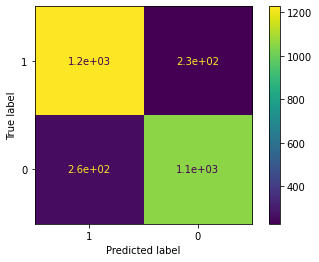

In [ ]:
import sklearn.metrics as metrics

pred_y = ebm.predict(X_val)

accuracy = metrics.accuracy_score(y_val, pred_y)

conf = metrics.confusion_matrix(y_val, pred_y)
confusion = metrics.ConfusionMatrixDisplay(conf, display_labels=[1, 0, -1])
print(accuracy)
confusion.plot()